# Question of the Week 11 - DATA 602

In [ ]:
import pandas as pd
from pandas import read_csv
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## 1. How do you plot a histogram in Seaborn?

You can plot a histogram with sns.histplot() or sns.displot(). I provided both examples below. You can add features with matplotlib. I included the example of adding titles to the plots using plt from the library matplotlib.

          date  actual_mean_temp  actual_min_temp  actual_max_temp  \
0     2014-7-1                81               72               89   
1     2014-7-2                82               72               91   
2     2014-7-3                78               69               87   
3     2014-7-4                70               65               74   
4     2014-7-5                72               63               81   
..         ...               ...              ...              ...   
360  2015-6-26                75               69               81   
361  2015-6-27                65               58               71   
362  2015-6-28                68               62               73   
363  2015-6-29                70               63               76   
364  2015-6-30                75               68               82   

     average_min_temp  average_max_temp  record_min_temp  record_max_temp  \
0                  68                83               52              100   
1    

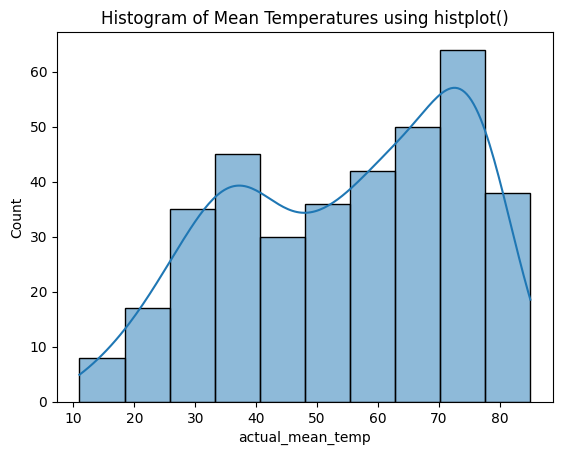

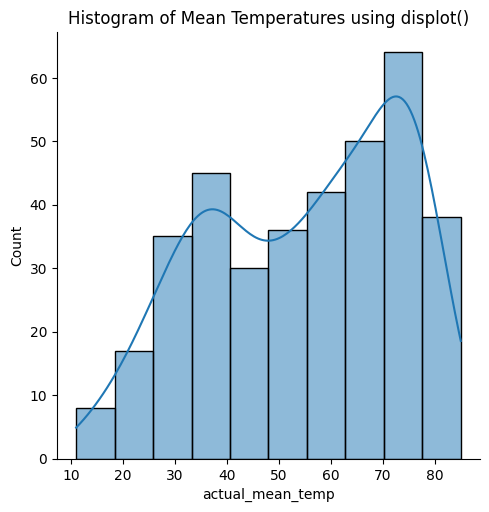

In [2]:
dataFrame = read_csv("https://raw.githubusercontent.com/juliaDataScience-22/cuny-spring-24/main/KNYC.csv")

sns.histplot(dataFrame, x = 'actual_mean_temp', kde = True)
plt.title("Histogram of Mean Temperatures using histplot()")

sns.displot(data = dataFrame, x = "actual_mean_temp", kde = True)
plt.title("Histogram of Mean Temperatures using displot()")

print(dataFrame)

## 2. Plot a histogram with NAs dropped.

To do this, remove the NA values from your data frame and then plot the values that are left. My data set did not contain NA values, so I manually added a few to then show how to remove them. To remove NA values, use the function dropna().

<ipython-input-3-90e4c78302f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['actual_mean_temp'][5] = np.nan


Text(0.5, 1.0, 'Histogram of Mean Temperatures Without NA Values')

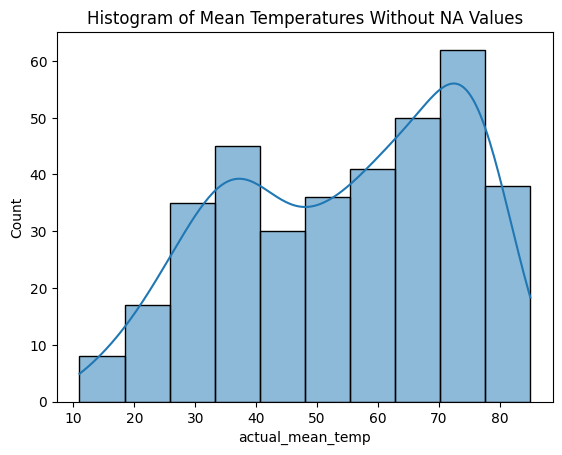

In [3]:
dataFrame['actual_mean_temp'][5] = np.nan
dataFrame['actual_mean_temp'][25] = np.nan
dataFrame['actual_mean_temp'][80] = np.nan

dataFrame = dataFrame.dropna()

sns.histplot(dataFrame, x = 'actual_mean_temp', kde = True)
plt.title("Histogram of Mean Temperatures Without NA Values")


## 3. How do you set the color for a histogram?

You can set the color by specifying the color parameter or the hue parameter. When you specify a color, that determines the color for the whole graph. When you specify hues, your graph will show different colors for different categories. Both examples are below. You can also specify colors for different categories with a palette. An example of using a palette is also shown below. It is not appropriate to use the extra colors (hue or paletter) for the data in my data frame because the categories are numeric, but the code is still a good example because it can be applied to other situations. Categorical variables with less than four different categories are ideal for using extra colors.

Note: the parameter 'step' was used for the bottom two examples to make the distinctions between categories more obvious. Without that, the layers overlapped too much and were more challenging to distinguish than the way they are now.

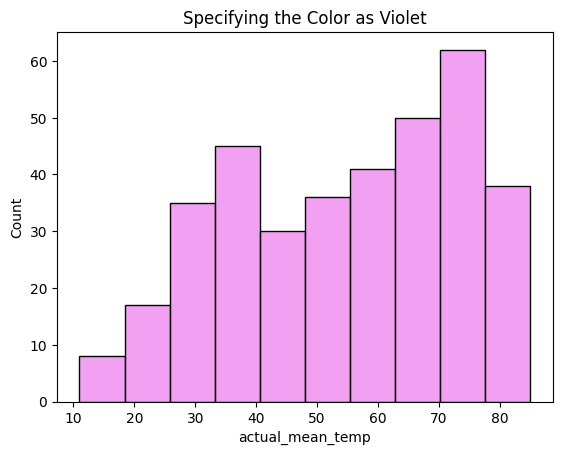

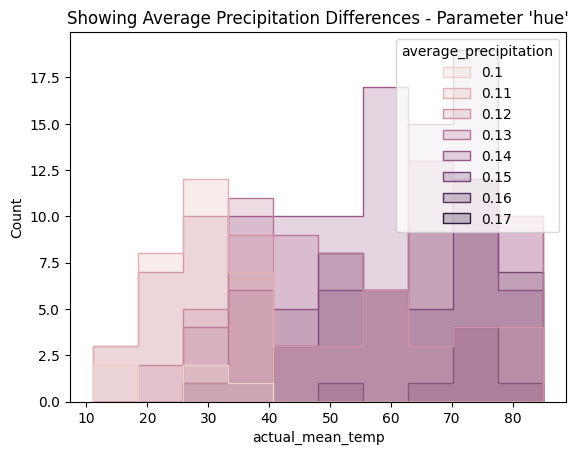

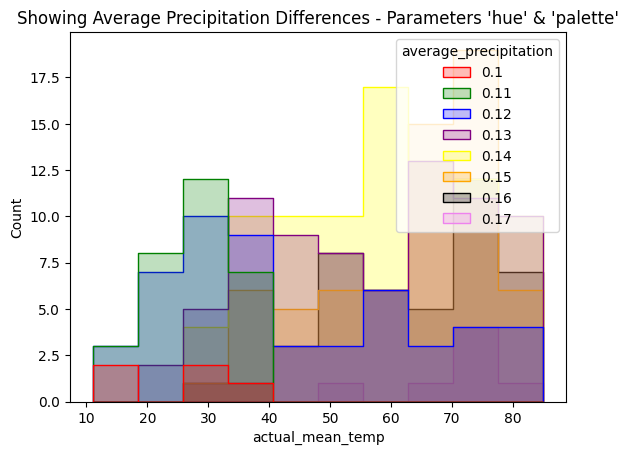

In [22]:
sns.histplot(x = "actual_mean_temp", data = dataFrame, color = "violet")
plt.title("Specifying the Color as Violet")
plt.show()

sns.histplot(x = "actual_mean_temp", data = dataFrame, hue = "average_precipitation", element = "step")
plt.title("Showing Average Precipitation Differences - Parameter 'hue'")
plt.show()

color_palette = {0.1: "red", 0.11: "green", 0.12: "blue", 0.13: "purple", 0.14: "yellow", 0.15: "orange", 0.16: "black", 0.17: "violet"}
sns.histplot(x = "actual_mean_temp", data = dataFrame, hue = "average_precipitation", palette = color_palette, element = "step")
plt.title("Showing Average Precipitation Differences - Parameters 'hue' & 'palette'")
plt.show()

## 4. What type of plot would allow you to compare two continuous features? Give an example of code.

Scatterplots and line plots allow for the comparison of two continuous features. The first graph shows a scatterplot of actual mean temperature and actual precipitation. The second graph shows a line plot of record max temperatures by date.

The second graph requires more code because the column containing information about the dates needed to be converted from a string to a time, and the ticks on the x-axis needed to show months instead of each individual day.

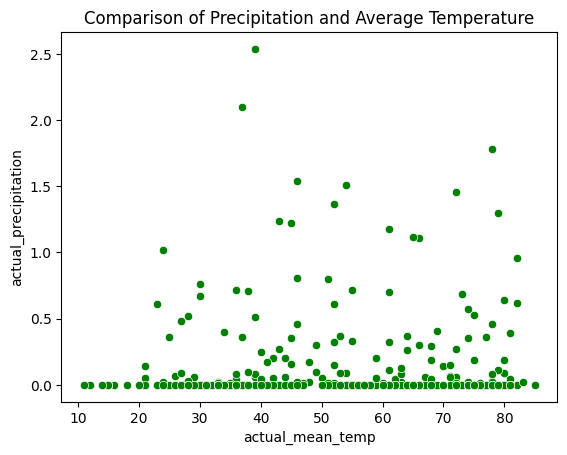

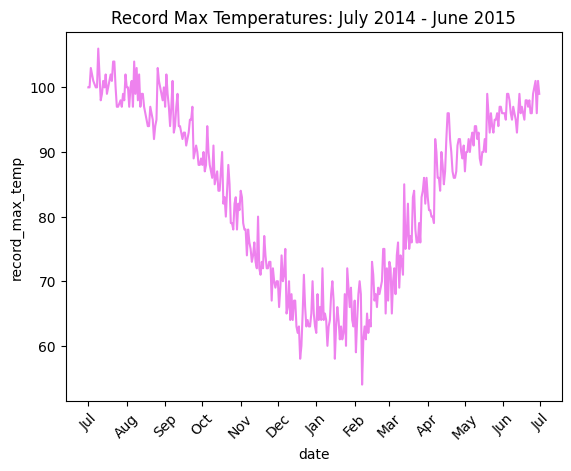

In [39]:
sns.scatterplot(x = "actual_mean_temp", y = "actual_precipitation", data = dataFrame, color = "green")
plt.title("Comparison of Precipitation and Average Temperature")
plt.show()

dataFrame['date'] = pd.to_datetime(dataFrame['date'])
sns.lineplot(x = "date", y = "record_max_temp", data = dataFrame, color = "violet")
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator())
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b'))
plt.xticks(rotation=45)
plt.title("Record Max Temperatures: July 2014 - June 2015")
plt.show()

## 5. Give an example of a correlation plot.

This correlation plot shows the relationship between average temperature, maximum temperature, minimum temperature, and precipitation. It appears that the temperatures correlated strongly with all other temperature variables included in the plot, but the temperatures did not correlate with precipitation in the slightest.

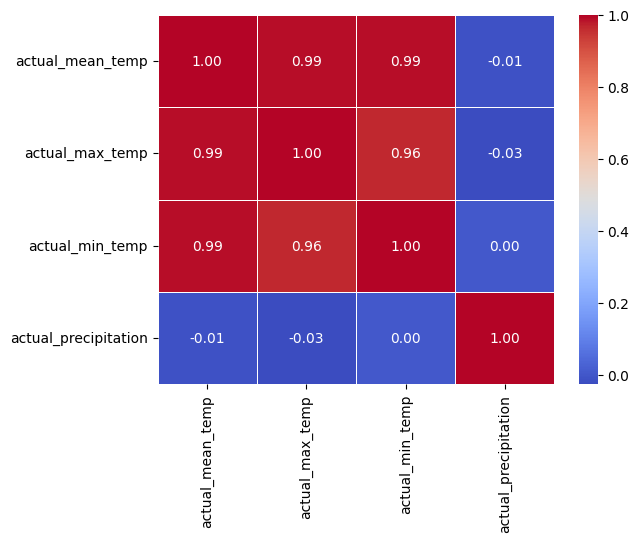

In [41]:
simplified = dataFrame[['actual_mean_temp', 'actual_max_temp', 'actual_min_temp', 'actual_precipitation']]
corr = simplified.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

## 6. Change the figure size of your plots.

To change the figure size, you can specify the parameter figsize with the function plt.figure(). An example is shown below of the lineplot from part 4. This plot is best when viewed wider since the data frame contains 365 rows, one for each day of the year.

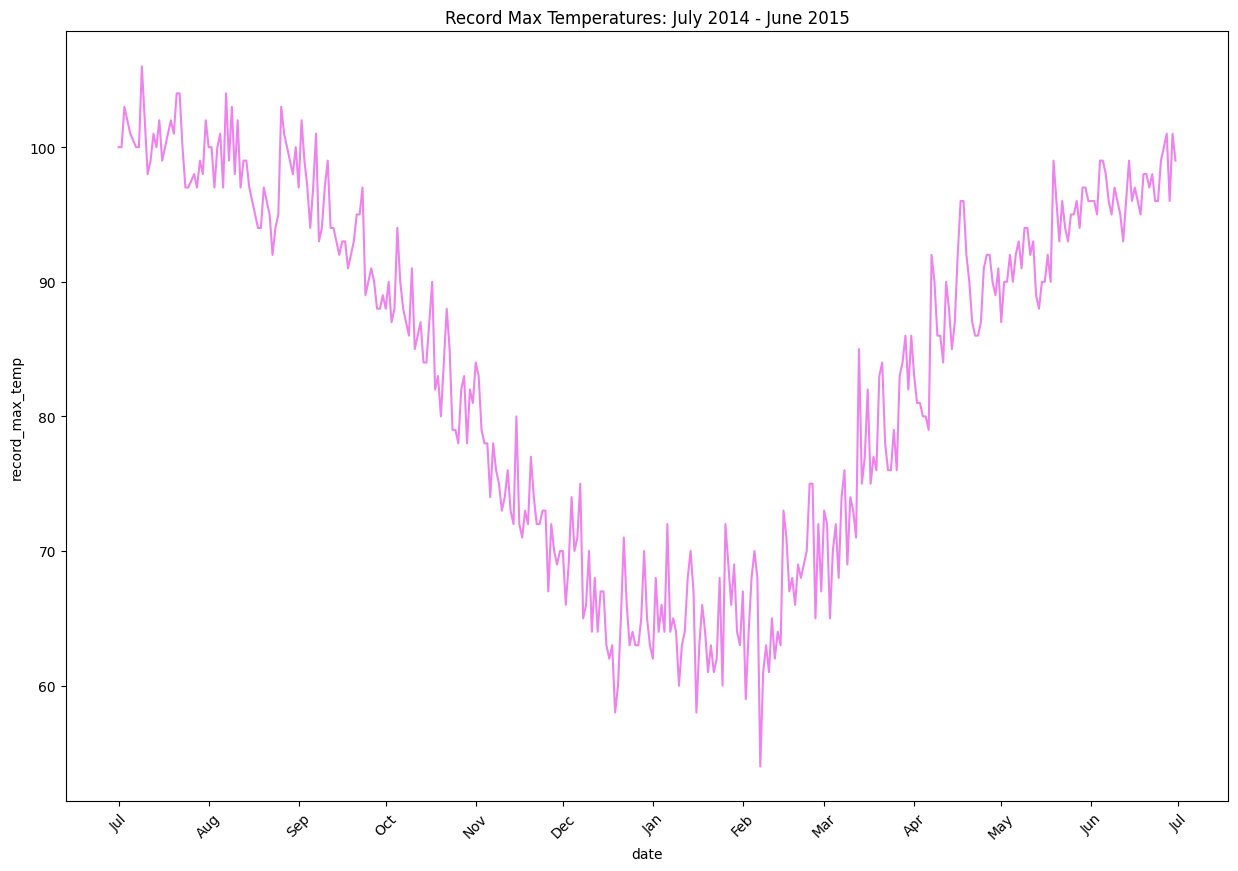

In [48]:
dataFrame['date'] = pd.to_datetime(dataFrame['date'])
plt.figure(figsize=(15,10))
sns.lineplot(x = "date", y = "record_max_temp", data = dataFrame, color = "violet")
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator())
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b'))
plt.xticks(rotation=45)
plt.title("Record Max Temperatures: July 2014 - June 2015")
plt.show()